<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Experiment-without-transformed-data" data-toc-modified-id="Experiment-without-transformed-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Experiment without transformed data</a></span></li><li><span><a href="#Comparing-base-line-models" data-toc-modified-id="Comparing-base-line-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparing base-line models</a></span></li><li><span><a href="#Individual-Estimators-and-tuning-them" data-toc-modified-id="Individual-Estimators-and-tuning-them-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Individual Estimators and tuning them</a></span><ul class="toc-item"><li><span><a href="#Light-Gradient-Boosting" data-toc-modified-id="Light-Gradient-Boosting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Light Gradient Boosting</a></span><ul class="toc-item"><li><span><a href="#Tuning-The-LightGBM" data-toc-modified-id="Tuning-The-LightGBM-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Tuning The LightGBM</a></span></li></ul></li><li><span><a href="#Results---1" data-toc-modified-id="Results---1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results - 1</a></span></li><li><span><a href="#Other-models-mentioned-in-the-paper" data-toc-modified-id="Other-models-mentioned-in-the-paper-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other models mentioned in the paper</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>KNN</a></span></li></ul></li><li><span><a href="#Ensembling" data-toc-modified-id="Ensembling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Ensembling</a></span><ul class="toc-item"><li><span><a href="#Ensembled-Light-Gradient-Boosting" data-toc-modified-id="Ensembled-Light-Gradient-Boosting-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Ensembled Light Gradient Boosting</a></span></li><li><span><a href="#Ensembled-Decision-Tree" data-toc-modified-id="Ensembled-Decision-Tree-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Ensembled Decision Tree</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Blending" data-toc-modified-id="Blending-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Blending</a></span></li><li><span><a href="#Results---2" data-toc-modified-id="Results---2-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Results - 2</a></span></li></ul></li><li><span><a href="#Experiment-with-transformed-data" data-toc-modified-id="Experiment-with-transformed-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experiment with transformed data</a></span><ul class="toc-item"><li><span><a href="#Results---3" data-toc-modified-id="Results---3-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Results - 3</a></span></li></ul></li><li><span><a href="#Using-Anova-Features" data-toc-modified-id="Using-Anova-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using Anova Features</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

Git Repo with all the results and models: [Diploma_thesis](https://github.com/Abhiswain97/Diploma_thesis)

In [1]:
from pycaret.classification import *
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns
from joblib import dump, load
import json
import os

sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)

In [8]:
model.score

<bound method ClassifierMixin.score of LGBMClassifier(bagging_fraction=1.0, bagging_freq=0, feature_fraction=0.4,
               learning_rate=0.05, min_child_samples=31, min_split_gain=0.2,
               n_estimators=200, num_leaves=90, random_state=8144,
               reg_alpha=0.7, reg_lambda=0.4)>

In [2]:
df = pd.read_csv("../DryBeanDataset/Dry_Bean_Dataset.csv").sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,25350,593.725,229.906869,140.679866,1.634256,0.790936,25595,179.656958,0.741618,0.990428,0.903685,0.781434,0.009069,0.002086,0.610639,0.997939,DERMASON
1,42622,766.745,286.947939,189.685525,1.512756,0.750346,43107,232.954965,0.772138,0.988749,0.911049,0.811837,0.006732,0.001804,0.659079,0.997026,SIRA
2,68638,1006.709,326.932818,269.379960,1.213649,0.566646,69930,295.622421,0.770348,0.981524,0.851073,0.904230,0.004763,0.001964,0.817632,0.992318,BARBUNYA
3,38424,724.092,268.018356,183.126413,1.463570,0.730174,38899,221.185344,0.708407,0.987789,0.920926,0.825262,0.006975,0.001996,0.681057,0.996775,DERMASON
4,38083,723.950,270.178999,179.878850,1.502005,0.746151,38481,220.201684,0.722336,0.989657,0.913112,0.815021,0.007094,0.001931,0.664260,0.997722,DERMASON


# Experiment without transformed data

Docs: [`PyCaret`](https://pycaret.gitbook.io/docs/)


We setup a pycaret `experiment`. The parameters are:
- `data`: df
- `target`: `Class`
- `normalize`: Normalizes all the numeric features using method mentioned using `normalize_method` if set to `True`
- `transformation`: Applies `yeo-johnson` transformation or method mentioned using `transform_method` if set to `True`
- `fix_imbalance`: Fixes imbalance using `SMOTE` or method mentioned using `imbalance_method` if set to `True`

In [4]:
exp = setup(
    data=df,
    target='Class', 
    train_size=0.7,
    experiment_name='baseline_without_transforms', 
    remove_perfect_collinearity=False
)

,Description,Value
0,session_id,8144
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparing base-line models

Calling the `compare_models()` is going to fit all classification models for our data

In [5]:
%%time
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9273,0.9943,0.9372,0.9278,0.9273,0.9121,0.9121,0.4590
rf,Random Forest Classifier,0.9264,0.9929,0.9355,0.9270,0.9265,0.9110,0.9111,0.5970
gbc,Gradient Boosting Classifier,0.9253,0.9939,0.9350,0.9260,0.9253,0.9096,0.9098,8.3420
et,Extra Trees Classifier,0.9219,0.9925,0.9312,0.9226,0.9220,0.9056,0.9057,0.2040
qda,Quadratic Discriminant Analysis,0.9152,0.9919,0.9289,0.9187,0.9155,0.8977,0.8984,0.0150
lda,Linear Discriminant Analysis,0.9072,0.9918,0.9184,0.9173,0.9088,0.8879,0.8897,0.0170
dt,Decision Tree Classifier,0.8913,0.9333,0.9060,0.8925,0.8915,0.8687,0.8688,0.0530
lr,Logistic Regression,0.8677,0.9805,0.8783,0.8689,0.8678,0.8400,0.8402,1.8500
ridge,Ridge Classifier,0.8575,0.0000,0.8722,0.8700,0.8503,0.8263,0.8335,0.0070
nb,Naive Bayes,0.7653,0.9644,0.7684,0.7658,0.7628,0.7163,0.7171,0.0090


Wall time: 2min 3s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8144, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

The F1 here is the weighted f1 we are using as a metric. So, that's good, we can also pass a custom metric

**Obvservation**

- Light Gradient Boosting Classifier performs the best among all the baselines, without us doig any transforming or feature selection at a F1 of approx ~ 93

This is pretty good, let's see if we can stretch it further using tuning the model.

# Individual Estimators and tuning them

We can see there's not much difference between gradient boosting and the LGBM Classifier. WE will start with LGBM as it's faster to train

In [6]:
def plot(estimator, plot_type, dst):
    res = plot_model(
        estimator=estimator, 
        plot=plot_type,
        save=True
    )
    
    os.rename(res, dst)
    for file in os.listdir("."): 
        if file.endswith('.png'):
            os.remove(file)


In [7]:
def clean_params(params):
    d = {}
    for key, value in params.items():
        d[key.replace('actual_estimator__', "")] = value 
    
    return d

## Light Gradient Boosting

In [8]:
%%time
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9066,0.9929,0.9184,0.9071,0.9064,0.8870,0.8872
1,0.9423,0.9962,0.9530,0.9426,0.9424,0.9303,0.9303
2,0.9265,0.9938,0.9380,0.9272,0.9266,0.9112,0.9113
3,0.9255,0.9940,0.9356,0.9256,0.9252,0.9099,0.9101
4,0.9087,0.9925,0.9165,0.9095,0.9090,0.8896,0.8896
5,0.9328,0.9947,0.9430,0.9337,0.9331,0.9189,0.9190
6,0.9339,0.9950,0.9458,0.9346,0.9340,0.9201,0.9202
7,0.9244,0.9930,0.9350,0.9251,0.9246,0.9085,0.9085
8,0.9359,0.9966,0.9413,0.9363,0.9358,0.9225,0.9226
9,0.9359,0.9950,0.9454,0.9365,0.9360,0.9225,0.9226


Wall time: 6.07 s


Plotting different plots like confusion matrix and auc is also very easy as simple as 1 line of code. We look at few plots, to asses performance

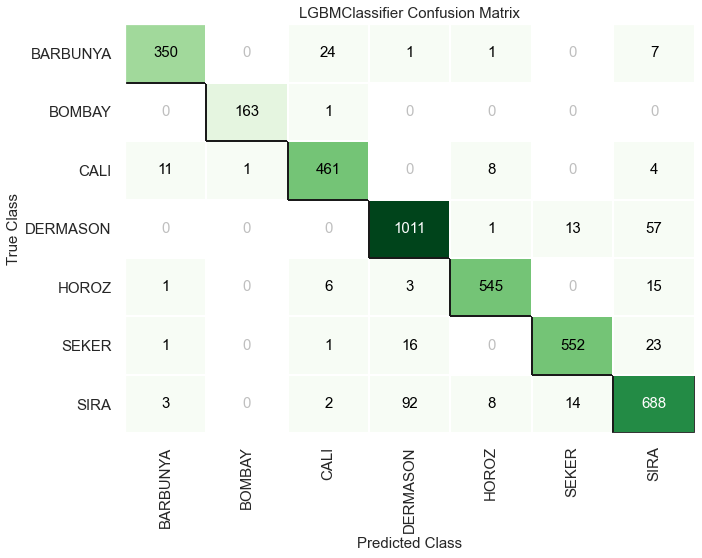

In [9]:
plot_model(lgbm, plot='confusion_matrix')

In [16]:
plot(estimator=lgbm, plot_type='class_report', dst=f'../ML_results/CF_LightGBM_without_trans_baseline.png')

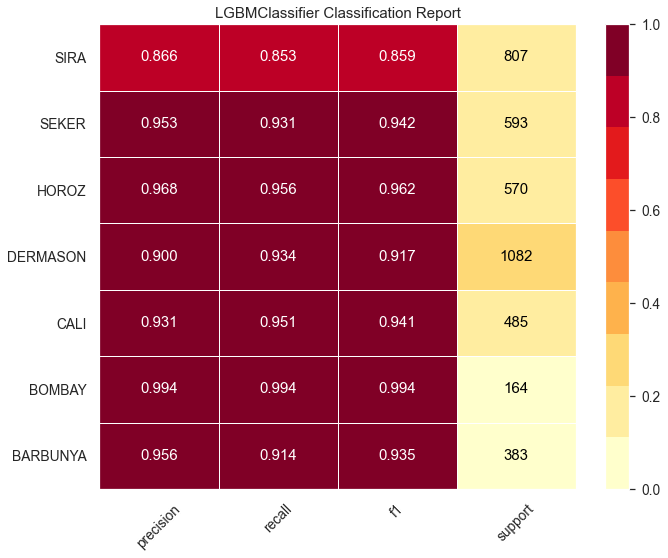

In [10]:
plot_model(lgbm, plot='class_report')

In [ ]:
plot(
    estimator=lgbm, 
    plot_type='class_report', 
    dst=f'../ML_results/ClassReport_LightGBM_without_trans_baseline.png'
)

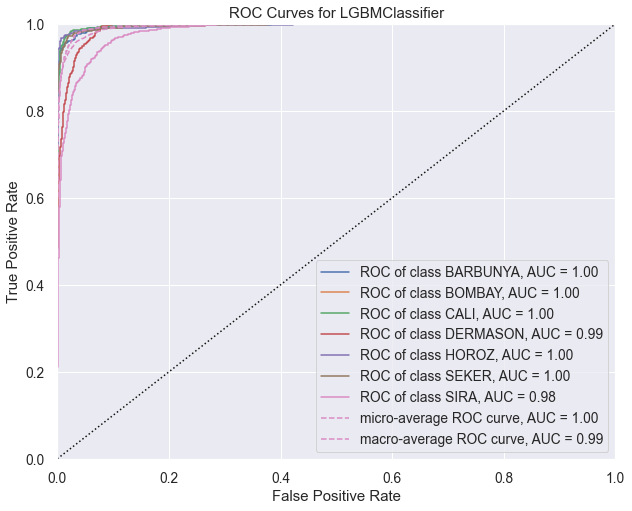

In [12]:
plot_model(estimator=lgbm, plot='auc')

In [14]:
plot(lgbm, plot_type='auc', dst=f"../ML_results/AUC_LightGBM_without_trans_baseline.png")

In [23]:
dump(lgbm, '../ML_models/LightGBM_baseline_without_trans.model')

['../ML_models/LightGBM_baseline_without_trans.model']

**Obvservation**

- The baseline lightgbm performs well with an f1 of approx ~ 93
- Our model seems to be confused between DERMASON and SIRA varieties
- Our precision, recall and f1 for each class is more than 86, which is also a good indication

### Tuning The LightGBM

Tuning the `LightGBMClassifier`. We can do Grid-search, Random-search as these are the good old hyper paramter tuning methods. But there's a more efficient tuning method using Bayesian Hyperparamter tuning. Here's a one line summary of what bayesian search is:

> Build a probability model of the objective function and use it to select the most promising hyperparameters to evaluate in the true objective function.

In [24]:
%%time
tuned_lgbm, tuner = tune_model(
    estimator=lgbm, 
    search_library="scikit-optimize",
    n_iter=25,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9129,0.9935,0.9235,0.9133,0.9126,0.8946,0.8949
1,0.9465,0.9967,0.9544,0.9467,0.9465,0.9353,0.9354
2,0.9244,0.9942,0.9357,0.9250,0.9245,0.9087,0.9087
3,0.9276,0.9935,0.9383,0.9275,0.9273,0.9126,0.9126
4,0.9066,0.9925,0.9192,0.9076,0.9070,0.8872,0.8872
5,0.9297,0.9950,0.9406,0.9304,0.9299,0.9151,0.9152
6,0.9328,0.9944,0.9469,0.9337,0.9331,0.9189,0.9190
7,0.9275,0.9938,0.9354,0.9282,0.9277,0.9123,0.9123
8,0.9349,0.9969,0.9410,0.9352,0.9347,0.9212,0.9214
9,0.9433,0.9952,0.9506,0.9438,0.9433,0.9314,0.9315


Wall time: 1min 53s


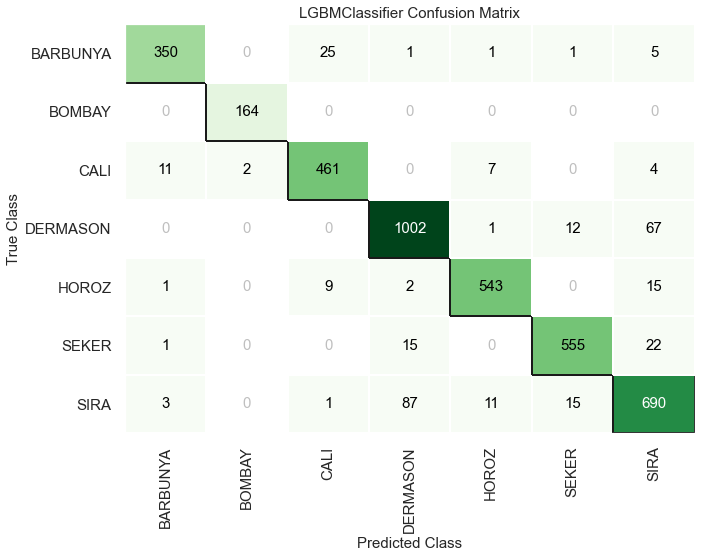

In [25]:
plot_model(tuned_lgbm, plot='confusion_matrix')

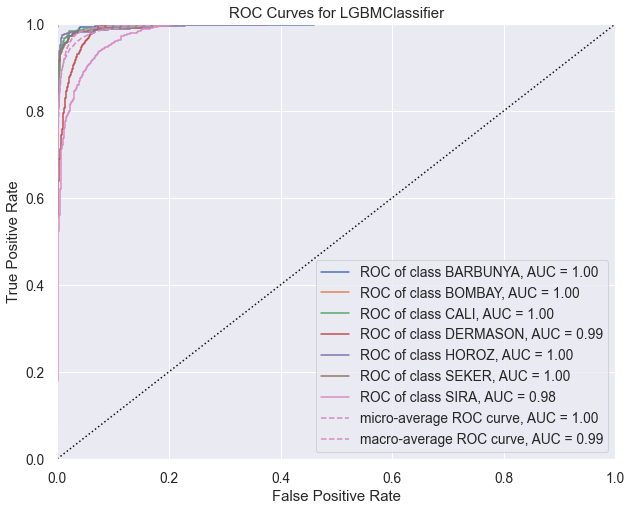

In [26]:
plot_model(tuned_lgbm, plot='auc')

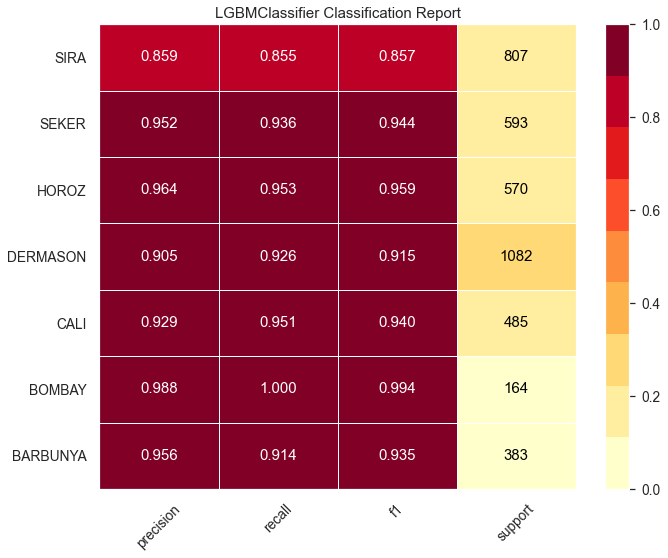

In [27]:
plot_model(tuned_lgbm, plot='class_report')

In [28]:
plot_model(tuned_lgbm, plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.17068347687192406
max_depth,-1
min_child_samples,54
min_child_weight,0.001
min_split_gain,0.17419389955036854
n_estimators,35


We can access the search space easily too:

In [29]:
params = tuner.get_params()
params['search_spaces']

{'actual_estimator__num_leaves': Integer(low=2, high=256, prior='uniform', transform='normalize'),
 'actual_estimator__learning_rate': Real(low=1e-06, high=0.5, prior='log-uniform', transform='normalize'),
 'actual_estimator__n_estimators': Integer(low=10, high=300, prior='uniform', transform='normalize'),
 'actual_estimator__min_split_gain': Real(low=0, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__reg_alpha': Real(low=1e-10, high=10, prior='log-uniform', transform='normalize'),
 'actual_estimator__reg_lambda': Real(low=1e-10, high=10, prior='log-uniform', transform='normalize'),
 'actual_estimator__feature_fraction': Real(low=0.4, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__bagging_fraction': Real(low=0.4, high=1, prior='uniform', transform='normalize'),
 'actual_estimator__bagging_freq': Integer(low=0, high=7, prior='uniform', transform='normalize'),
 'actual_estimator__min_child_samples': Integer(low=1, high=100, prior='uniform', tran

In [30]:
tuner.best_params_

OrderedDict([('actual_estimator__bagging_fraction', 0.9377745305741579),
             ('actual_estimator__bagging_freq', 0),
             ('actual_estimator__feature_fraction', 0.8544547496702325),
             ('actual_estimator__learning_rate', 0.17068347687192406),
             ('actual_estimator__min_child_samples', 54),
             ('actual_estimator__min_split_gain', 0.17419389955036854),
             ('actual_estimator__n_estimators', 35),
             ('actual_estimator__num_leaves', 11),
             ('actual_estimator__reg_alpha', 3.874048071018437e-06),
             ('actual_estimator__reg_lambda', 0.8044843779216543)])

All of the class stuff we wrote in the previous notebook where we were doing custom tuning is now reduced to just a single line of code and we have full control over it. The default search-space provided in pycaret is good enough for tuning, but we also pass a custom grid like we did in our previous notebook

In [32]:
plot(
    tuned_lgbm, 
    plot_type='confusion_matrix', 
    dst='../ML_results/CF_Tuned_LightGBM_without_trans.png'
)

In [34]:
plot(tuned_lgbm, plot_type='auc', dst='../ML_results/AUC_Tuned_LightGBM_without_trans.png')

In [36]:
plot(tuned_lgbm, plot_type='class_report', dst='../ML_results/ClassReport_Tuned_LightGBM_without_trans.png')

In [37]:
dump(tuned_lgbm, filename='../ML_models/Tuned_LightGBM_without_trans.model')

['../ML_models/Tuned_LightGBM_without_trans.model']

We can also let pycaret choose for us if we don't want to use bayesian search

In [38]:
tuned_lgbm_auto, tuner_auto = tune_model(
    estimator=lgbm, 
    choose_better=True,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9938,0.9266,0.9166,0.9158,0.8984,0.8987
1,0.9475,0.9966,0.9556,0.9476,0.9475,0.9366,0.9366
2,0.9265,0.9941,0.9377,0.9271,0.9267,0.9112,0.9113
3,0.9307,0.9938,0.9396,0.9308,0.9304,0.9163,0.9165
4,0.9077,0.9920,0.9177,0.9086,0.9080,0.8883,0.8884
5,0.9255,0.9946,0.9364,0.9263,0.9257,0.9100,0.9101
6,0.9265,0.9943,0.9385,0.9276,0.9267,0.9113,0.9114
7,0.9307,0.9938,0.9378,0.9322,0.9311,0.9161,0.9162
8,0.9370,0.9971,0.9411,0.9372,0.9368,0.9238,0.9239
9,0.9412,0.9951,0.9494,0.9416,0.9412,0.9289,0.9289


In [39]:
tuner_auto.best_params_

{'actual_estimator__reg_lambda': 0.4,
 'actual_estimator__reg_alpha': 0.7,
 'actual_estimator__num_leaves': 90,
 'actual_estimator__n_estimators': 200,
 'actual_estimator__min_split_gain': 0.2,
 'actual_estimator__min_child_samples': 31,
 'actual_estimator__learning_rate': 0.05,
 'actual_estimator__feature_fraction': 0.4,
 'actual_estimator__bagging_freq': 0,
 'actual_estimator__bagging_fraction': 1.0}

In [40]:
tuner_auto.__class__

sklearn.model_selection._search.RandomizedSearchCV

**Obvservation**

- Setting `choose_better=True`, it uses RandomSearchCV instead of BayesSearchCV
- RandomizedCV is used which does increase the f1 score to 92.90

## Results - 1

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.89 % with a LightGBM, which you can say is faster to train than the SVM whose time complexity would be Quadratic
> - I have used no preprocessing or transformation or fixed the target imbalance, similar to the paper
> - I have used all the 16 features

In [41]:
dump(tuned_lgbm_auto, '../ML_models/Auto_tuned_LightGBM_without_trans.model')

['../ML_models/Auto_tuned_LightGBM_without_trans.model']

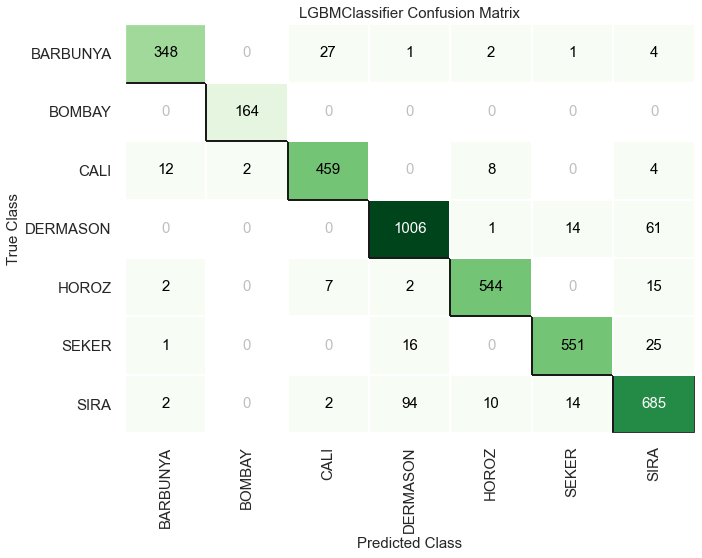

In [42]:
plot_model(tuned_lgbm_auto, plot='confusion_matrix')

## Other models mentioned in the paper

### Decision Tree

In [45]:
%%time
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8919,0.9329,0.9080,0.8920,0.8919,0.8693,0.8694
1,0.8888,0.9321,0.9051,0.8900,0.8887,0.8658,0.8659
2,0.8930,0.9343,0.9094,0.8946,0.8934,0.8708,0.8709
3,0.8877,0.9310,0.8972,0.8876,0.8873,0.8642,0.8644
4,0.8678,0.9188,0.8875,0.8704,0.8686,0.8403,0.8406
5,0.8972,0.9371,0.9100,0.8988,0.8976,0.8758,0.8759
6,0.8835,0.9288,0.9013,0.8861,0.8841,0.8595,0.8598
7,0.8866,0.9304,0.9012,0.8895,0.8873,0.8630,0.8633
8,0.9097,0.9448,0.9197,0.9098,0.9093,0.8908,0.8910
9,0.9065,0.9426,0.9205,0.9065,0.9063,0.8871,0.8872


Wall time: 5.81 s


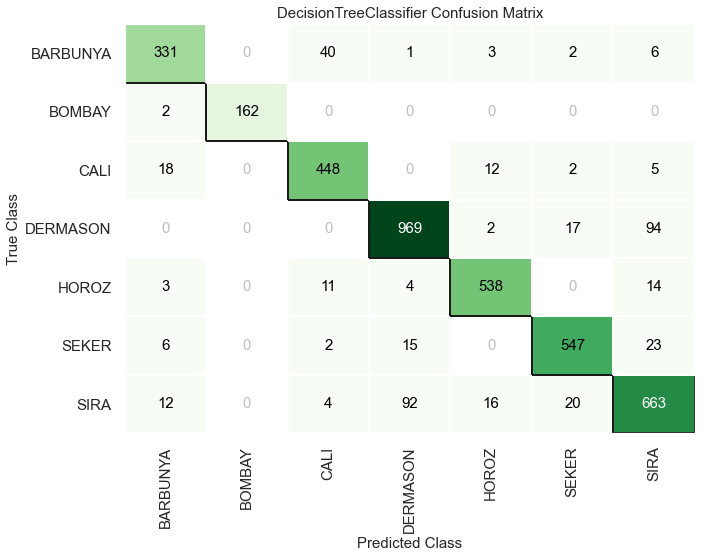

In [47]:
plot_model(dt, plot='confusion_matrix')

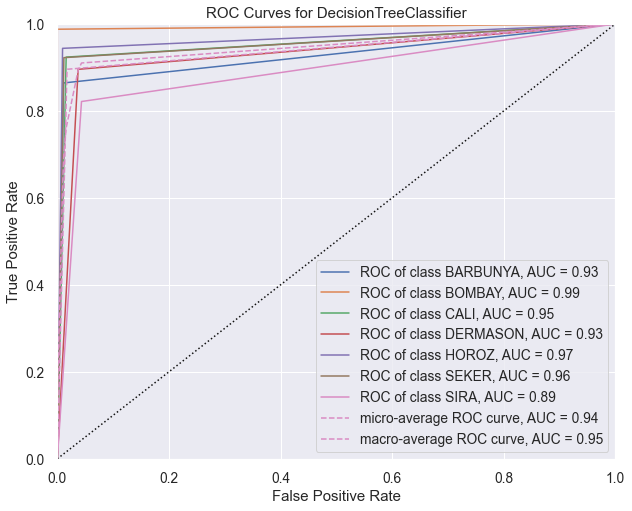

In [48]:
plot_model(dt, plot='auc')

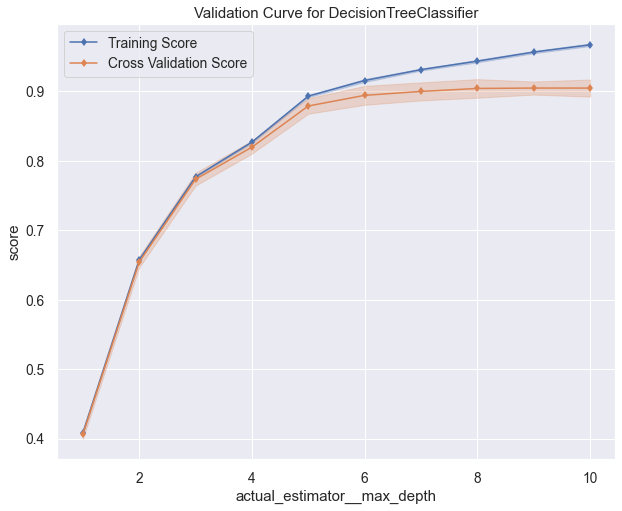

In [49]:
plot_model(dt, plot='vc')

### KNN

In [51]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7135,0.9244,0.7141,0.7170,0.7103,0.6515,0.6534
1,0.7209,0.9353,0.7231,0.7211,0.7183,0.6616,0.6625
2,0.7324,0.9236,0.7290,0.7326,0.7298,0.6752,0.6762
3,0.7009,0.9146,0.6983,0.6991,0.6970,0.6367,0.6378
4,0.7093,0.9239,0.7114,0.7082,0.7065,0.6471,0.6479
5,0.7083,0.9200,0.7108,0.7091,0.7064,0.6464,0.6472
6,0.7104,0.9257,0.7110,0.7087,0.7072,0.6489,0.6496
7,0.7048,0.9295,0.6962,0.7026,0.6991,0.6405,0.6422
8,0.7216,0.9291,0.7210,0.7248,0.7204,0.6627,0.6638
9,0.7195,0.9256,0.7175,0.7191,0.7163,0.6592,0.6604


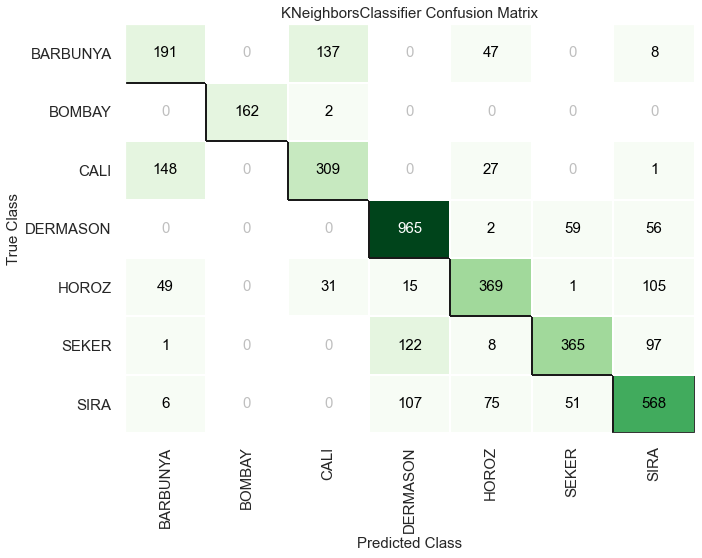

In [52]:
plot_model(knn, plot='confusion_matrix')

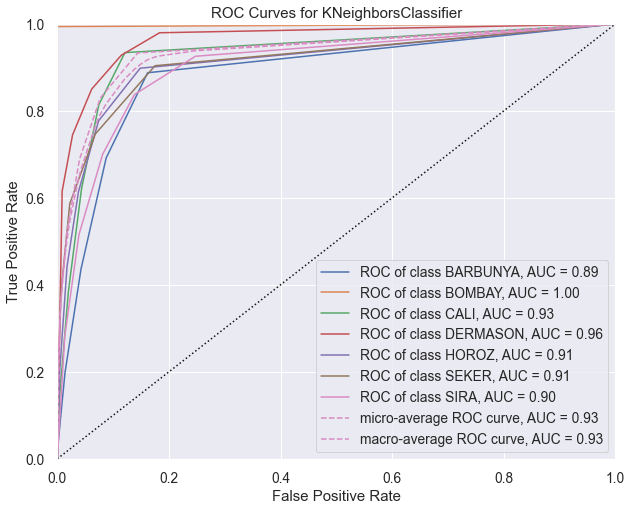

In [53]:
plot_model(knn, plot='auc')

## Ensembling

### Ensembled Light Gradient Boosting

In [55]:
ensembled_lgbm = ensemble_model(tuned_lgbm_auto, optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9129,0.9937,0.9237,0.9133,0.9126,0.8946,0.8949
1,0.9423,0.9964,0.9507,0.9426,0.9424,0.9303,0.9303
2,0.9234,0.9944,0.9339,0.9236,0.9234,0.9074,0.9074
3,0.9286,0.9932,0.9375,0.9286,0.9284,0.9138,0.9139
4,0.9066,0.9920,0.9197,0.9079,0.9071,0.8871,0.8872
5,0.9286,0.9951,0.9390,0.9300,0.9290,0.9138,0.9140
6,0.9339,0.9946,0.9460,0.9343,0.9338,0.9201,0.9202
7,0.9317,0.9942,0.9394,0.9329,0.9321,0.9174,0.9175
8,0.9338,0.9968,0.9379,0.9343,0.9337,0.9199,0.9201
9,0.9359,0.9949,0.9441,0.9363,0.9359,0.9225,0.9226


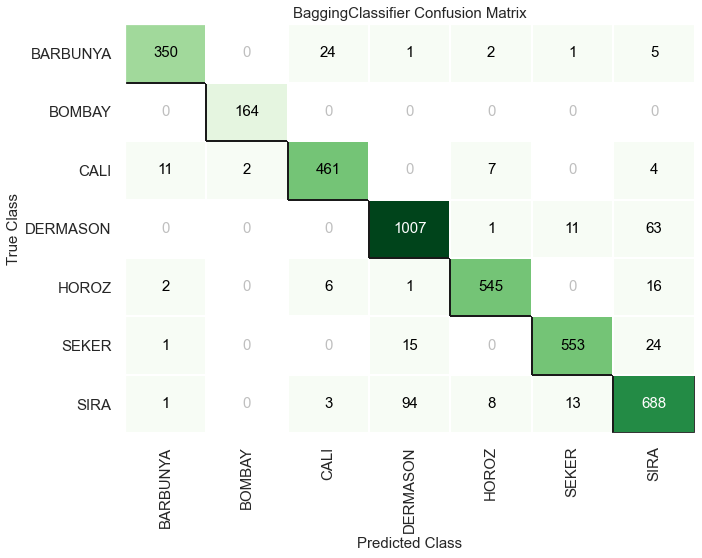

In [56]:
plot_model(ensembled_lgbm, plot='confusion_matrix')

### Ensembled Decision Tree

In [57]:
ensembled_dt = ensemble_model(dt, n_estimators=100, optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9119,0.9905,0.9241,0.9121,0.9116,0.8934,0.8936
1,0.9360,0.9953,0.9439,0.9365,0.9362,0.9227,0.9227
2,0.9286,0.9915,0.9388,0.9292,0.9288,0.9137,0.9138
3,0.9255,0.9891,0.9345,0.9253,0.9253,0.9100,0.9100
4,0.8993,0.9876,0.9137,0.8996,0.8994,0.8782,0.8783
5,0.9265,0.9937,0.9367,0.9271,0.9267,0.9113,0.9113
6,0.9234,0.9928,0.9360,0.9233,0.9232,0.9075,0.9076
7,0.9181,0.9913,0.9269,0.9187,0.9182,0.9008,0.9009
8,0.9317,0.9951,0.9341,0.9327,0.9316,0.9174,0.9177
9,0.9317,0.9931,0.9399,0.9322,0.9317,0.9174,0.9175


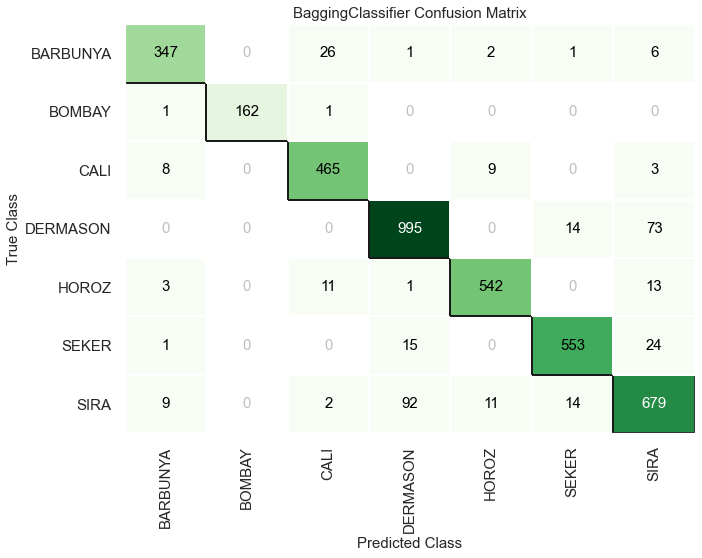

In [58]:
plot_model(ensembled_dt, plot='confusion_matrix')

**Obvsesrvation**

- Both the ensembled LightGBM and Decision tree, do not do well than out tuned LightGBM model.

## Random Forest

In [59]:
rf = create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9140,0.9913,0.9245,0.9146,0.9136,0.8959,0.8962
1,0.9402,0.9959,0.9507,0.9406,0.9403,0.9278,0.9278
2,0.9297,0.9934,0.9398,0.9303,0.9298,0.9150,0.9151
3,0.9318,0.9913,0.9393,0.9317,0.9317,0.9176,0.9176
4,0.9087,0.9885,0.9196,0.9092,0.9089,0.8896,0.8896
5,0.9276,0.9946,0.9376,0.9284,0.9278,0.9125,0.9126
6,0.9234,0.9928,0.9347,0.9240,0.9232,0.9075,0.9076
7,0.9244,0.9921,0.9316,0.9255,0.9247,0.9085,0.9086
8,0.9296,0.9950,0.9359,0.9299,0.9296,0.9149,0.9150
9,0.9349,0.9939,0.9415,0.9355,0.9349,0.9213,0.9214


In [60]:
tuned_rf_auto, tuner_auto_rf = tune_model(
    estimator=rf, 
    choose_better=True,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9129,0.9930,0.9229,0.9131,0.9130,0.8947,0.8947
1,0.9402,0.9959,0.9519,0.9419,0.9404,0.9279,0.9282
2,0.9182,0.9942,0.9329,0.9198,0.9185,0.9012,0.9014
3,0.9203,0.9922,0.9271,0.9202,0.9201,0.9037,0.9037
4,0.8940,0.9906,0.9078,0.8956,0.8946,0.8720,0.8721
5,0.9307,0.9951,0.9427,0.9329,0.9312,0.9164,0.9168
6,0.9234,0.9943,0.9384,0.9243,0.9233,0.9076,0.9077
7,0.9244,0.9934,0.9348,0.9255,0.9247,0.9086,0.9087
8,0.9296,0.9959,0.9354,0.9303,0.9297,0.9150,0.9150
9,0.9307,0.9939,0.9391,0.9319,0.9307,0.9163,0.9165


## Blending

We will try blending the tuned light gbm and ensembled decision tree model

In [62]:
blended_lgbm_rf = blend_models(estimator_list=[tuned_lgbm_auto, rf], optimize='f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9129,0.9936,0.9232,0.9137,0.9126,0.8946,0.8950
1,0.9454,0.9966,0.9538,0.9457,0.9455,0.9341,0.9341
2,0.9276,0.9945,0.9382,0.9279,0.9277,0.9125,0.9125
3,0.9297,0.9936,0.9376,0.9296,0.9294,0.9150,0.9151
4,0.9066,0.9917,0.9198,0.9071,0.9068,0.8871,0.8871
5,0.9276,0.9951,0.9385,0.9287,0.9278,0.9125,0.9127
6,0.9265,0.9942,0.9385,0.9273,0.9265,0.9113,0.9114
7,0.9296,0.9935,0.9368,0.9312,0.9300,0.9148,0.9150
8,0.9359,0.9969,0.9402,0.9362,0.9358,0.9225,0.9226
9,0.9380,0.9949,0.9447,0.9385,0.9380,0.9251,0.9251


In [64]:
tuned_blended_lgbm_rf = tune_model(
    estimator=blended_lgbm_rf, 
    search_library='scikit-optimize',
    n_iter=25,
    optimize='f1'
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9161,0.9938,0.9266,0.9166,0.9158,0.8984,0.8987
1,0.9475,0.9966,0.9556,0.9476,0.9475,0.9366,0.9366
2,0.9265,0.9941,0.9377,0.9271,0.9267,0.9112,0.9113
3,0.9307,0.9938,0.9396,0.9308,0.9304,0.9163,0.9165
4,0.9077,0.9920,0.9177,0.9086,0.9080,0.8883,0.8884
5,0.9255,0.9946,0.9364,0.9263,0.9257,0.9100,0.9101
6,0.9265,0.9943,0.9385,0.9276,0.9267,0.9113,0.9114
7,0.9307,0.9938,0.9378,0.9322,0.9311,0.9161,0.9162
8,0.9370,0.9971,0.9411,0.9372,0.9368,0.9238,0.9239
9,0.9412,0.9951,0.9494,0.9416,0.9412,0.9289,0.9289


## Results - 2

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.89 % after tuning the blended model of auto tuned LightGBM + Random Forest which is the same as that of auto tuned Light Gradient Boosting. 
> - I have used no preprocessing or transformation or fixed the target imbalance, similar to the paper
> - I have used all the 16 features

In [65]:
dump(tuned_blended_lgbm_rf, '../ML_models/Tuned_Blended_LGBM+RF.model')

['../ML_models/Tuned_Blended_LGBM+RF.model']

# Experiment with transformed data

In [3]:
exp1 = setup(
    data=df,
    target='Class', 
    train_size=0.7,
    experiment_name='baseline_with_transforms', 
    remove_perfect_collinearity=False, fix_imbalance=True, normalize=True, transformation=True
)

,Description,Value
0,session_id,2440
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
best_models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9240,0.9937,0.9368,0.9248,0.9241,0.9083,0.9084,1.1110
gbc,Gradient Boosting Classifier,0.9230,0.9933,0.9348,0.9238,0.9231,0.9070,0.9072,31.5350
rf,Random Forest Classifier,0.9205,0.9921,0.9310,0.9211,0.9205,0.9041,0.9042,1.3210
et,Extra Trees Classifier,0.9199,0.9918,0.9304,0.9206,0.9200,0.9033,0.9034,0.5040
lr,Logistic Regression,0.9190,0.9934,0.9334,0.9203,0.9191,0.9023,0.9025,1.2380
knn,K Neighbors Classifier,0.9155,0.9782,0.9294,0.9163,0.9156,0.8981,0.8982,0.1660
qda,Quadratic Discriminant Analysis,0.9078,0.9910,0.9254,0.9133,0.9085,0.8891,0.8902,0.0510
svm,SVM - Linear Kernel,0.9077,0.0000,0.9216,0.9090,0.9071,0.8887,0.8892,0.1580
lda,Linear Discriminant Analysis,0.9054,0.9922,0.9218,0.9120,0.9063,0.8861,0.8873,0.0920
dt,Decision Tree Classifier,0.8949,0.9355,0.9105,0.8954,0.8948,0.8733,0.8734,0.2340


In [5]:
best_models[0]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2440, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

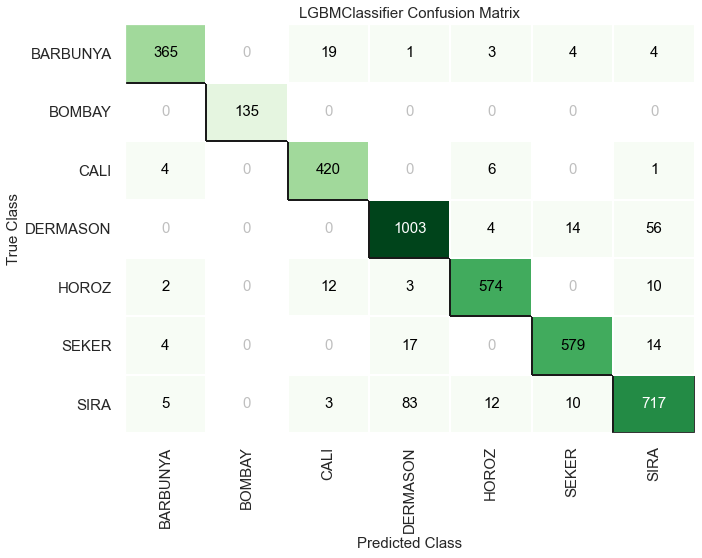

In [7]:
plot_model(best_models[0], plot='confusion_matrix')

In [9]:
%%time
tuned_lgbm_transformed, tuner_lgbm_transformed = tune_model(
    best_models[0], 
    optimize='f1',
    choose_better=True,
    search_library='scikit-optimize', 
    return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9234,0.9933,0.9370,0.9243,0.9236,0.9076,0.9077
1,0.9328,0.9931,0.9438,0.9336,0.9331,0.9190,0.9190
2,0.9265,0.9954,0.9339,0.9265,0.9264,0.9113,0.9113
3,0.9203,0.9929,0.9301,0.9214,0.9203,0.9037,0.9038
4,0.9077,0.9912,0.9253,0.9076,0.9075,0.8886,0.8887
5,0.9192,0.9942,0.9310,0.9190,0.9190,0.9025,0.9026
6,0.9244,0.9931,0.9378,0.9241,0.9241,0.9089,0.9089
7,0.9275,0.9945,0.9392,0.9272,0.9273,0.9126,0.9126
8,0.9233,0.9936,0.9380,0.9253,0.9237,0.9076,0.9079
9,0.9433,0.9948,0.9532,0.9440,0.9434,0.9316,0.9317


Wall time: 1min 45s


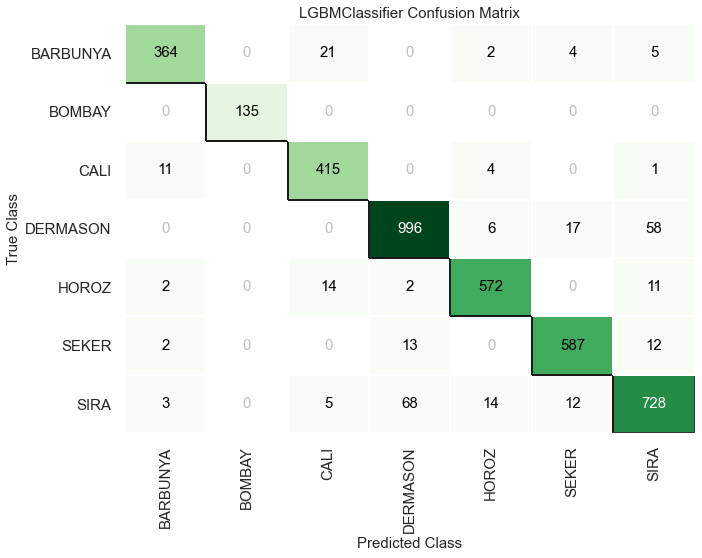

In [10]:
plot_model(tuned_lgbm_transformed, plot='confusion_matrix')

## Results - 3

> - The highest accuracy score mentioned in the paper which is 93.13 %. In the paper, they get to it through SVM with a polynomial kernel.
> - We have reached an accuracy of 92.9 % ~ 93 % with tuned lightgbm without preprocessing the data.
> - I have used all the 16 features

# Using Anova Features

In [11]:
anova_df = pd.read_csv('../feat_files/ANOVA F-test.csv')

In [12]:
anova_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2,Class
0,42339,741.226,260.199330,207.306394,42676,232.180294,0.006146,0.002403,SEKER
1,68247,1088.754,370.368146,237.863792,70172,294.779204,0.005427,0.001343,BARBUNYA
2,37856,708.716,248.430330,194.360324,38232,219.544429,0.006563,0.002469,SEKER
3,33143,648.385,222.526309,189.737379,33377,205.423899,0.006714,0.003008,SEKER
4,29925,647.570,237.714031,161.004849,30321,195.196551,0.007944,0.002228,DERMASON


In [13]:
exp3 = setup(
    data=anova_df,
    target='Class', 
    train_size=0.7,
    experiment_name='anova_without_transforms'
)

,Description,Value
0,session_id,1975
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"BARBUNYA: 0, BOMBAY: 1, CALI: 2, DERMASON: 3, HOROZ: 4, SEKER: 5, SIRA: 6"
4,Original Data,"(13611, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9094,0.9915,0.9248,0.9115,0.9095,0.8908,0.8913,0.0100
rf,Random Forest Classifier,0.9075,0.9885,0.9153,0.9082,0.9074,0.8882,0.8884,0.3070
gbc,Gradient Boosting Classifier,0.9065,0.9908,0.9138,0.9071,0.9063,0.8869,0.8871,3.4200
lightgbm,Light Gradient Boosting Machine,0.9054,0.9912,0.9149,0.9062,0.9055,0.8857,0.8858,0.2780
et,Extra Trees Classifier,0.9018,0.9875,0.9103,0.9026,0.9016,0.8812,0.8814,0.1660
lr,Logistic Regression,0.9010,0.9899,0.9121,0.9020,0.9011,0.8804,0.8806,1.6980
lda,Linear Discriminant Analysis,0.8903,0.9899,0.9052,0.9049,0.8923,0.8677,0.8705,0.0130
dt,Decision Tree Classifier,0.8762,0.9244,0.8887,0.8768,0.8762,0.8506,0.8507,0.0210
ridge,Ridge Classifier,0.8184,0.0000,0.8325,0.8369,0.8068,0.7786,0.7886,0.0060
knn,K Neighbors Classifier,0.7957,0.9524,0.7853,0.7994,0.7913,0.7520,0.7539,0.0340


In [15]:
tuned_qda, tuner_qda = tune_model(
    estimator=best_model, 
    search_library="scikit-optimize",
    n_iter=25,
    optimize='f1', return_tuner=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9203,0.9913,0.9321,0.9207,0.9200,0.9038,0.9039
1,0.9087,0.9898,0.9215,0.9109,0.9094,0.8897,0.8899
2,0.9224,0.9916,0.9297,0.9237,0.9225,0.9063,0.9065
3,0.8993,0.9898,0.9133,0.9004,0.8995,0.8784,0.8785
4,0.9098,0.9886,0.9251,0.9112,0.9100,0.8913,0.8915
5,0.9098,0.9877,0.9239,0.9115,0.9102,0.8911,0.8913
6,0.9129,0.9921,0.9240,0.9154,0.9133,0.8949,0.8953
7,0.9170,0.9901,0.9292,0.9191,0.9175,0.8999,0.9001
8,0.9128,0.9925,0.9281,0.9165,0.9133,0.8949,0.8956
9,0.8950,0.9890,0.9136,0.8994,0.8958,0.8734,0.8742


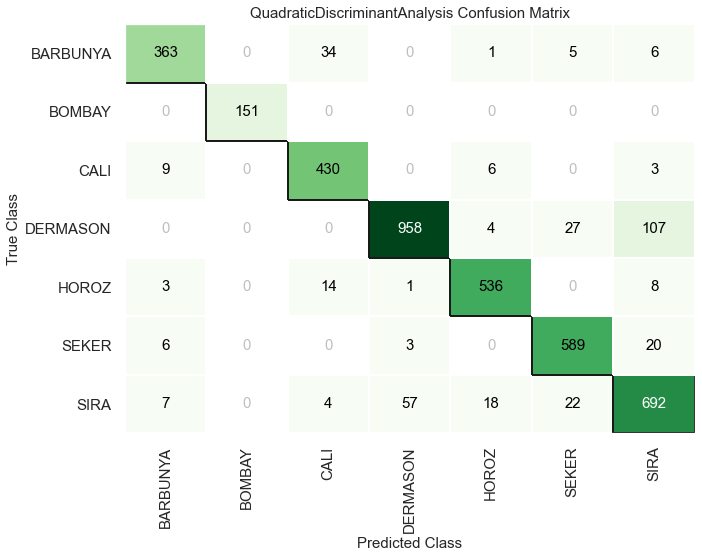

In [18]:
plot_model(best_model, plot='confusion_matrix')

# Conclusion

- The best model found was Auto Tuned Light GBM using RnadomSearchCV

Git Repo with all the results and models: [Diploma_thesis](https://github.com/Abhiswain97/Diploma_thesis)